In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [7]:
# Importing the drive module from google.colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Defining the path to the TATAMOTORS.NS file from google drive
tes_data='/content/drive/MyDrive/TATAMOTORS.NS.csv'
# Reading the data from the above file
data=pd.read_csv(tes_data)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-01-02,20.959597,21.857864,20.959597,21.857864,15.690222,0.0
1,1991-01-03,20.959597,21.857864,20.959597,21.857864,15.690222,0.0
2,1991-01-04,21.857864,21.857864,21.857864,21.857864,15.690222,0.0
3,1991-01-07,20.360750,21.259020,20.061329,21.109308,15.152890,0.0
4,1991-01-08,21.109308,21.109308,21.109308,21.109308,15.152890,0.0
...,...,...,...,...,...,...,...
8454,2024-06-10,977.000000,984.900024,969.099976,975.150024,972.150024,9258931.0
8455,2024-06-11,973.799988,992.549988,966.650024,987.099976,987.099976,14828702.0
8456,2024-06-12,994.500000,1010.250000,987.000000,988.700012,988.700012,17527993.0
8457,2024-06-13,1002.000000,1002.000000,980.750000,985.849976,985.849976,12157226.0


In [9]:
#Printing frist 10 rows of data
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-01-02,20.959597,21.857864,20.959597,21.857864,15.690222,0.0
1,1991-01-03,20.959597,21.857864,20.959597,21.857864,15.690222,0.0
2,1991-01-04,21.857864,21.857864,21.857864,21.857864,15.690222,0.0
3,1991-01-07,20.360750,21.259020,20.061329,21.109308,15.152890,0.0
4,1991-01-08,21.109308,21.109308,21.109308,21.109308,15.152890,0.0
5,1991-01-09,21.259020,21.259020,20.061329,20.510462,14.723013,0.0
6,1991-01-10,20.510462,20.510462,20.510462,20.510462,14.723013,0.0
7,1991-01-11,20.360750,20.959597,20.061329,20.959597,15.045416,0.0
8,1991-01-14,20.660173,20.660173,20.061329,20.360750,14.615552,0.0
9,1991-01-15,20.360750,20.360750,20.360750,20.360750,14.615552,0.0


In [11]:
#Printing last 5 rows of data
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
8454,2024-06-10,977.000000,984.900024,969.099976,975.150024,972.150024,9258931.0
8455,2024-06-11,973.799988,992.549988,966.650024,987.099976,987.099976,14828702.0
8456,2024-06-12,994.500000,1010.250000,987.000000,988.700012,988.700012,17527993.0
8457,2024-06-13,1002.000000,1002.000000,980.750000,985.849976,985.849976,12157226.0
8458,2024-06-14,990.000000,997.250000,981.400024,993.400024,993.400024,11591421.0


In [12]:
#Display the number of features(rows,columns) in the input file
data.shape

(8459, 7)

In [13]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8459 entries, 0 to 8458
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8459 non-null   object 
 1   Open       8452 non-null   float64
 2   High       8452 non-null   float64
 3   Low        8452 non-null   float64
 4   Close      8452 non-null   float64
 5   Adj Close  8452 non-null   float64
 6   Volume     8452 non-null   float64
dtypes: float64(6), object(1)
memory usage: 462.7+ KB


In [14]:
#To Find the duplicate row
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8454    False
8455    False
8456    False
8457    False
8458    False
Length: 8459, dtype: bool

In [15]:
#To find null values in the rows
data.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [16]:
#Dropping the null values
data=data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-01-02,20.959597,21.857864,20.959597,21.857864,15.690222,0.0
1,1991-01-03,20.959597,21.857864,20.959597,21.857864,15.690222,0.0
2,1991-01-04,21.857864,21.857864,21.857864,21.857864,15.690222,0.0
3,1991-01-07,20.360750,21.259020,20.061329,21.109308,15.152890,0.0
4,1991-01-08,21.109308,21.109308,21.109308,21.109308,15.152890,0.0
...,...,...,...,...,...,...,...
8454,2024-06-10,977.000000,984.900024,969.099976,975.150024,972.150024,9258931.0
8455,2024-06-11,973.799988,992.549988,966.650024,987.099976,987.099976,14828702.0
8456,2024-06-12,994.500000,1010.250000,987.000000,988.700012,988.700012,17527993.0
8457,2024-06-13,1002.000000,1002.000000,980.750000,985.849976,985.849976,12157226.0


In [17]:
#Re-checking the data still containing null values or not.
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
#Defining Statistical summary
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8.452000e+03
mean,185.383088,188.060565,182.357681,185.111980,176.602805,1.283007e+07
std,184.884107,186.912242,182.383734,184.557391,187.346651,1.943447e+07
min,11.114574,11.631977,11.028340,11.267879,9.043226,0.000000e+00
25%,47.312397,48.635847,46.269856,47.344734,36.261381,3.117761e+06
50%,103.029469,105.320179,101.358212,103.258816,91.414856,7.756801e+06
75%,290.025002,294.874687,284.436638,289.412498,285.281342,1.480041e+07
max,1038.000000,1065.599976,1030.400024,1046.650024,1043.430054,3.905778e+08


In [19]:
# Defning the outlier_detection to find the number outliers in each class.
def outlier_detection(columns):
    outliers = {}
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[column] = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers


data_valid = data
fts = ['Open','High','Low','Close','Adj Close','Volume']
outlierss = outlier_detection(fts)
# Get the list of column names
columns = list(outlierss.keys())
i = 0
while i < len(columns):
    col = columns[i]s
    out = outlierss[col]
    print(f'Number of outliers in {col}: {len(out)}')
    i += 1


Number of outliers in Open: 8452
Number of outliers in High: 8452
Number of outliers in Low: 8452
Number of outliers in Close: 8452
Number of outliers in Adj Close: 8452
Number of outliers in Volume: 8452


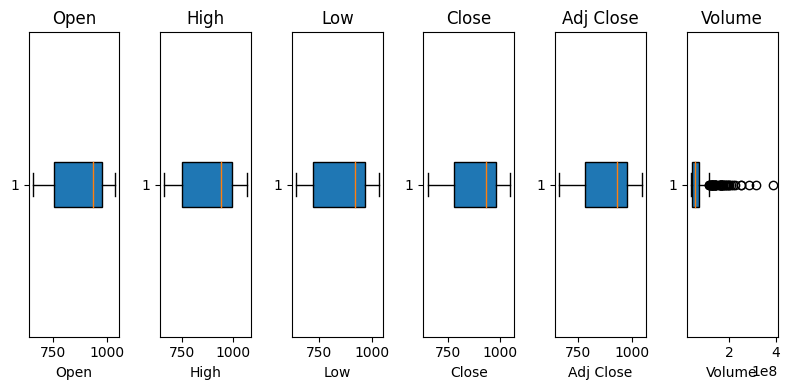

In [20]:
#Plotting to check the outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
for i, feature in enumerate(fts, start=1):
    plt.subplot(1, len(fts), i)
    plt.boxplot(data_valid[feature][outlierss[feature]], vert=False, patch_artist=True)
    plt.xlabel(feature)
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()

In [23]:
def remove_outliers(data, columns):

    for column in columns:
        q1 = data[column].quantile(0.15)
        q3 = data[column].quantile(0.85)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data


data_valid = data
features = ['Open','High','Low','Close','Adj Close','Volume']
final_data = remove_outliers(data_valid, features)
columns = list(final_data.keys())
i = 0
while i < len(columns):
    col = columns[i]
    out = final_data[col]
    print(f'Number of outliers in {col}: {len(out)}')
    i += 1

Number of outliers in Date: 8167
Number of outliers in Open: 8167
Number of outliers in High: 8167
Number of outliers in Low: 8167
Number of outliers in Close: 8167
Number of outliers in Adj Close: 8167
Number of outliers in Volume: 8167


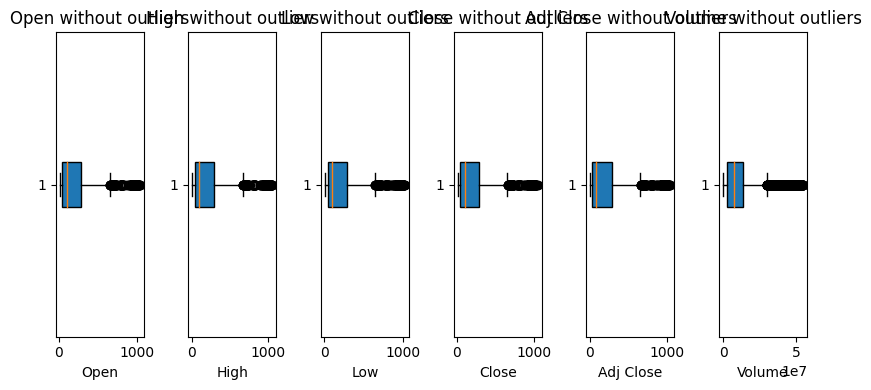

In [24]:
#Plotting after removing outliers
plt.figure(figsize=(8, 4))
for i, feature in enumerate(fts, start=1):
    plt.subplot(1, len(fts), i)
    plt.boxplot(final_data[feature], vert=False, patch_artist=True)
    plt.xlabel(feature)
    plt.title(f'{feature} without outliers')

plt.tight_layout()
plt.show()


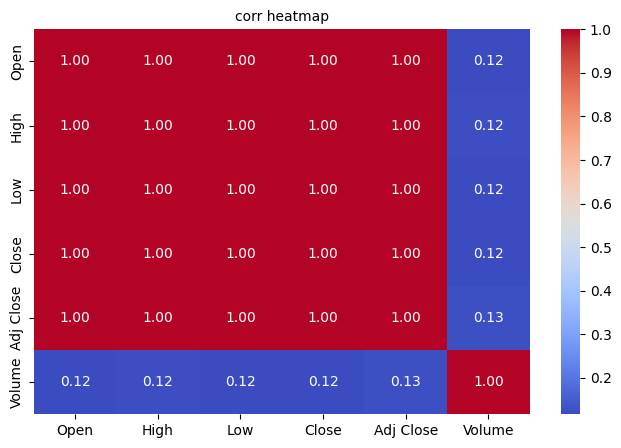

In [25]:
#Cororelation matrix
data_final=final_data.iloc[:,1:]
plt.figure(figsize=(8,5))
sns.heatmap(data_final.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('corr heatmap',fontsize=10)
plt.show()

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

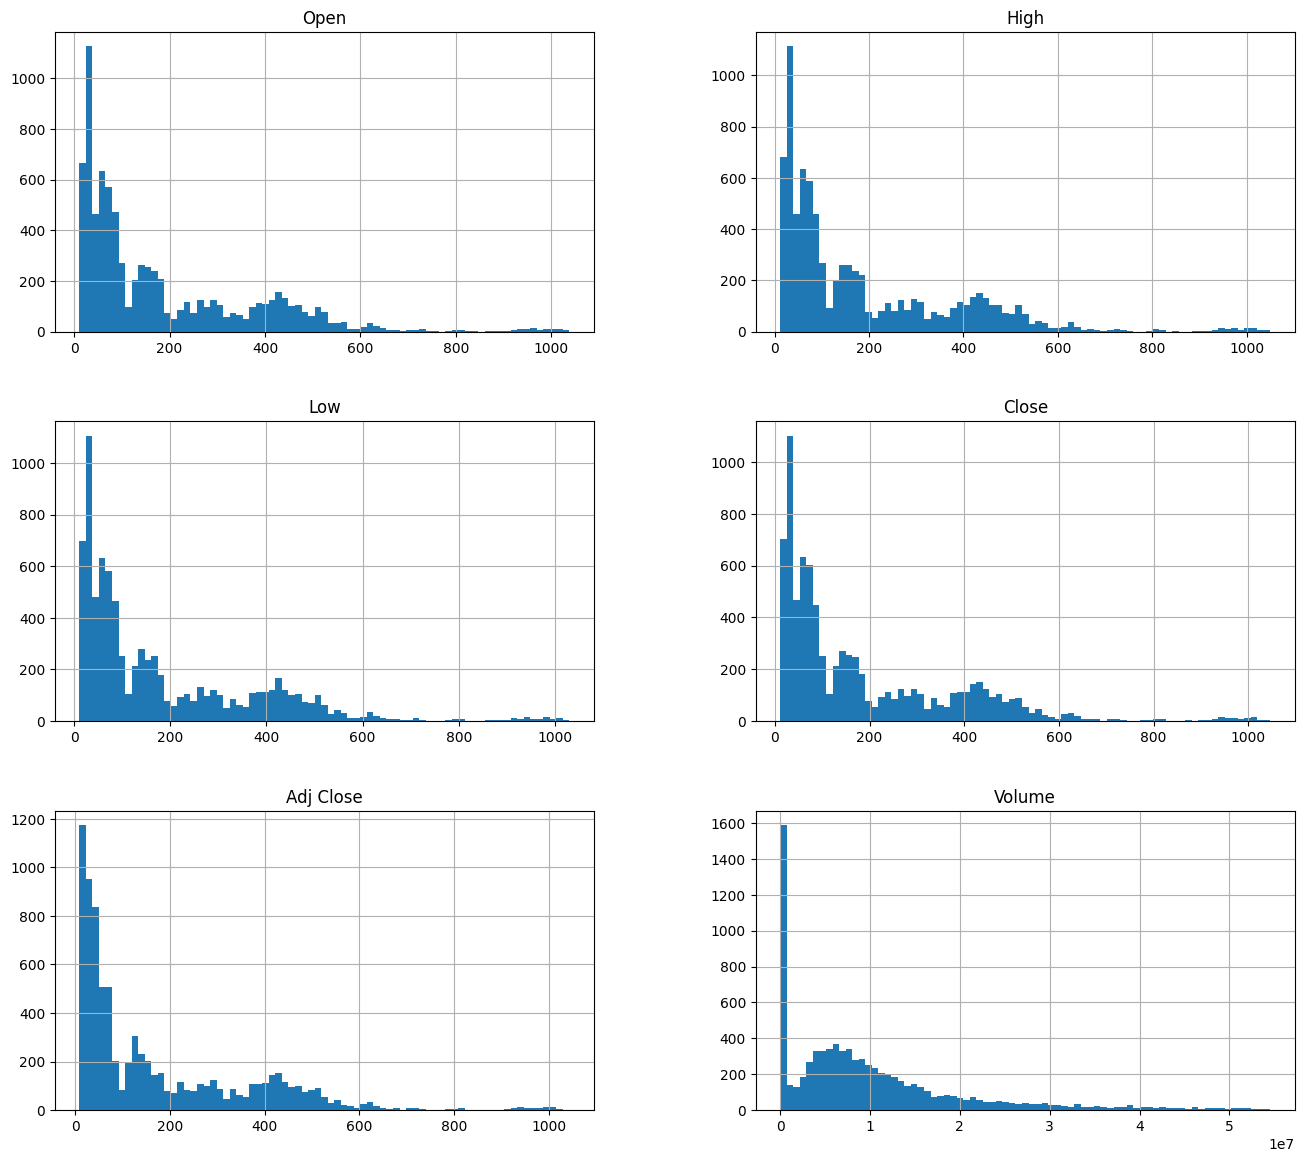

In [26]:
#Generate histograms for each column
data_final.hist(bins=75,figsize=(16,14))

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8167 entries, 0 to 8458
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8167 non-null   float64
 1   High       8167 non-null   float64
 2   Low        8167 non-null   float64
 3   Close      8167 non-null   float64
 4   Adj Close  8167 non-null   float64
 5   Volume     8167 non-null   float64
dtypes: float64(6)
memory usage: 446.6 KB


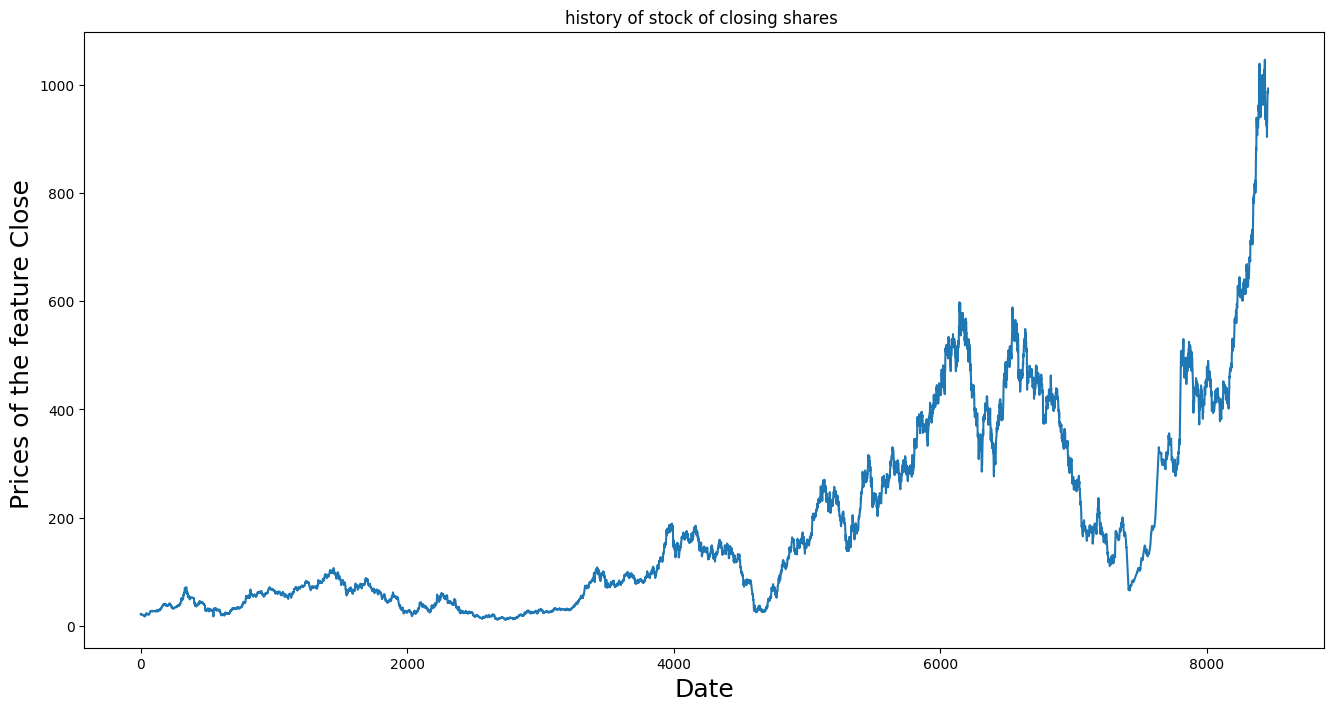

In [ ]:
#Historical graph closing prices of the stock over time.
plt.figure(figsize=(16,8))
plt.title('history of stock of closing shares ')
plt.plot(data_final['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prices of the feature Close ', fontsize=18)
plt.show()

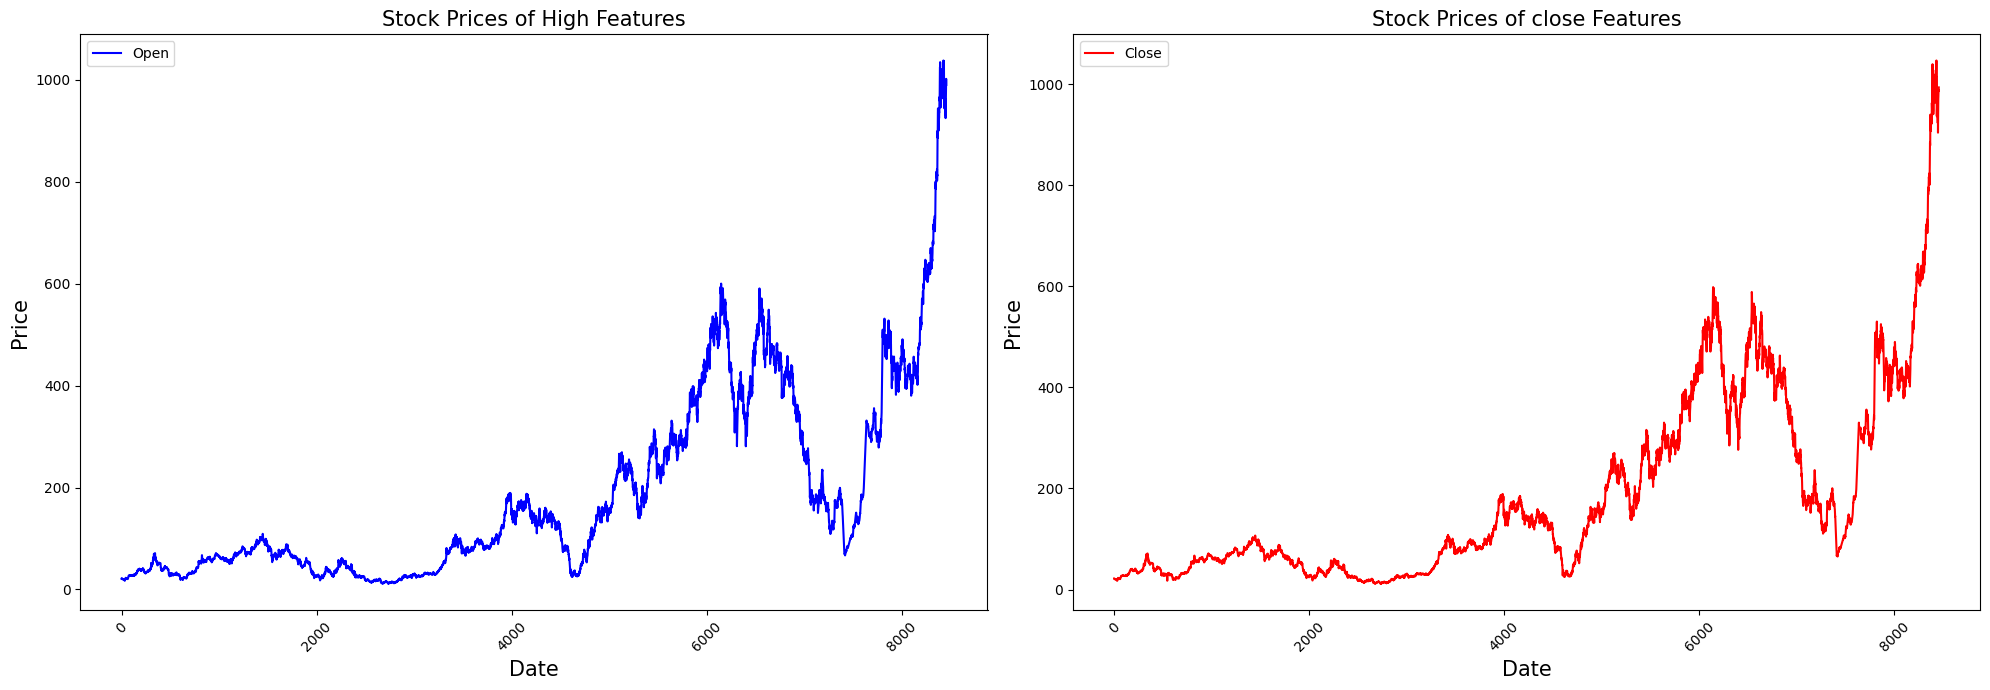

In [ ]:
#Plotting the 'High' Features and 'Close' Features
import pandas as pd
def plot(data_final):
    fig, pt = plt.subplots(1, 2, figsize=(20, 7))
    pt[0].plot(data_final['Open'], label='Open', color='blue')
    pt[0].set_xlabel('Date', size=15)
    pt[0].set_ylabel('Price', size=15)
    pt[0].legend()
    pt[0].set_title('Stock Prices of High Features', size=15)
    pt[0].tick_params(axis='x', rotation=45)

    pt[1].plot(data_final['Close'], label='Close', color='red')
    pt[1].set_xlabel('Date', size=15)
    pt[1].set_ylabel('Price', size=15)
    pt[1].legend()
    pt[1].set_title('Stock Prices of close Features', size=15)
    pt[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


plot(data_final)


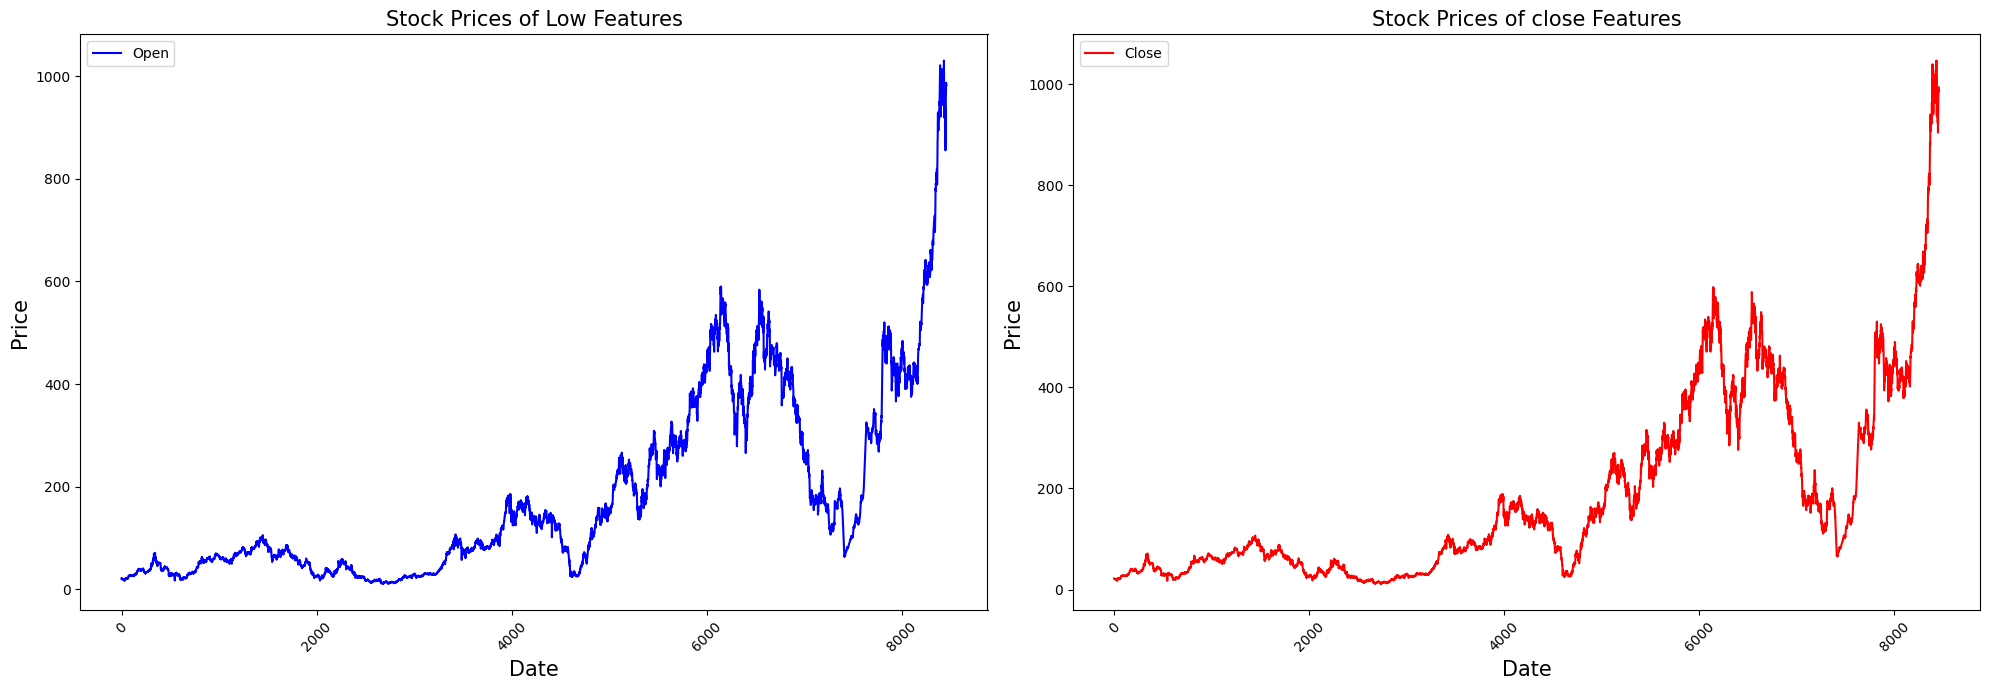

In [27]:
#Plotting the 'Low' prices and 'Close' prices
import pandas as pd
def plot(data_final):
    fig, pt = plt.subplots(1, 2, figsize=(20, 7))
    pt[0].plot(data_final['Low'], label='Open', color='blue')
    pt[0].set_xlabel('Date', size=15)
    pt[0].set_ylabel('Price', size=15)
    pt[0].legend()
    pt[0].set_title('Stock Prices of Low Features', size=15)
    pt[0].tick_params(axis='x', rotation=45)

    pt[1].plot(data_final['Close'], label='Close', color='red')
    pt[1].set_xlabel('Date', size=15)
    pt[1].set_ylabel('Price', size=15)
    pt[1].legend()
    pt[1].set_title('Stock Prices of close Features', size=15)
    pt[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


plot(data_final)


In [28]:
#Defining fetaures(X) and label(y)
X=data_final.drop('Close' , axis=1)
y=data_final['Close']


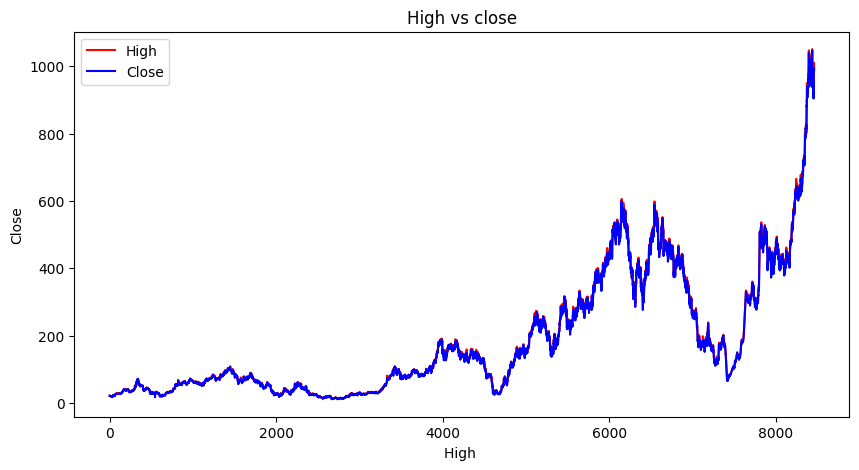

In [30]:
# Plotting the 'High' and 'Close' prices
plt.figure(figsize=(10,5))
plt.plot(X['High'],label='High',c='red')
plt.plot(y,label='Close',c='blue')
plt.xlabel('High ')
plt.ylabel('Close')
plt.title('High vs close')
plt.legend()
plt.show()

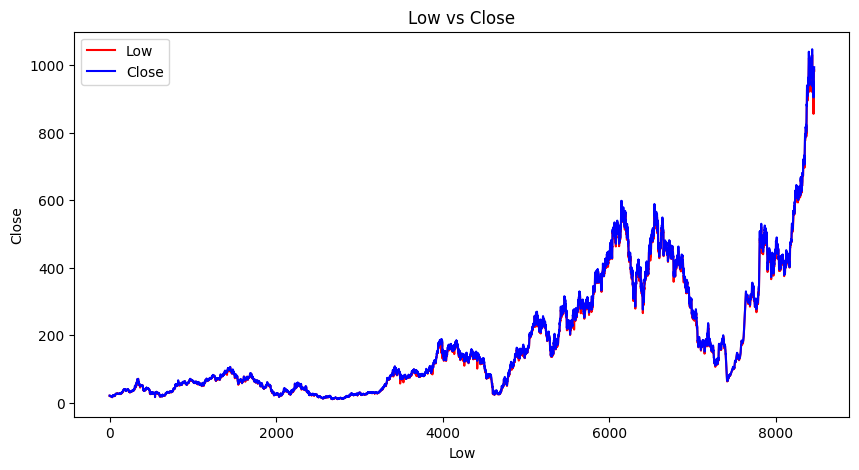

In [29]:
# Plotting the 'Low' and 'Close' prices
plt.figure(figsize=(10,5))
plt.plot(X['Low'],label='Low',c='red')
plt.plot(y,label='Close',c='blue')
plt.xlabel('Low')
plt.ylabel('Close')
plt.title('Low vs Close')
plt.legend()
plt.show()

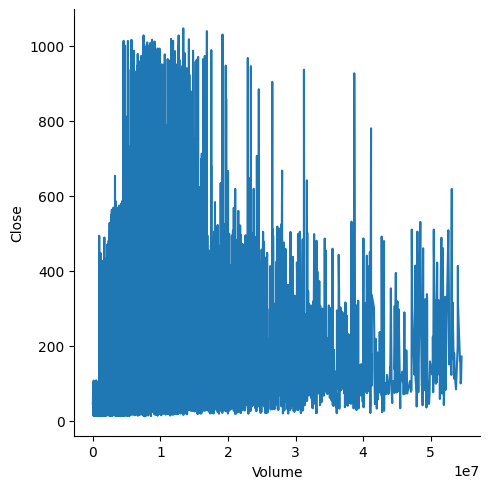

In [32]:
#Plotting the graph between 'Volume' and 'Close'
sns.relplot(data=data_final, x="Volume", y="Close", kind='line')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

#Normalizing X and y
norm_x=scale.fit_transform(X)
norm_y=scale.fit_transform(np.array(y).reshape(-1,1))
# Splitting the dataset into training and testing datasets ; 70%-training
X_train,X_test,y_train,y_test=train_test_split(norm_x,norm_y,test_size=0.3,random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
x_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(x_test.shape)


(2451, 1, 5)


In [33]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import tensorflow as tf


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

# Defining the LSTM model architecture
lstm_model=Sequential()
lstm_model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # Updated input shape
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=60, activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(units=80, activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.4))
lstm_model.add(LSTM(units=120, activation='relu', return_sequences=False))
lstm_model.add(Dropout(0.5))

lstm_model.add(Dense(units=1))
lstm_model.summary()
# Compiling the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
# Defining the early stopping with patience-10 to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 50)             11200     
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 60)             26640     
                                                                 
 dropout_5 (Dropout)         (None, 1, 60)             0         
                                                                 
 lstm_6 (LSTM)               (None, 1, 80)             45120     
                                                                 
 dropout_6 (Dropout)         (None, 1, 80)             0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [36]:
# Training the LSTM model
lstm_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
179/179 [==============================] - 10s 11ms/step - loss: 0.0197
Epoch 2/100
179/179 [==============================] - 2s 11ms/step - loss: 0.0034
Epoch 3/100
179/179 [==============================] - 2s 10ms/step - loss: 0.0029
Epoch 4/100
179/179 [==============================] - 2s 10ms/step - loss: 0.0025
Epoch 5/100
179/179 [==============================] - 4s 20ms/step - loss: 0.0023
Epoch 6/100
179/179 [==============================] - 4s 25ms/step - loss: 0.0021
Epoch 7/100
179/179 [==============================] - 4s 19ms/step - loss: 0.0021
Epoch 8/100
179/179 [==============================] - 3s 15ms/step - loss: 0.0020
Epoch 9/100
179/179 [==============================] - 2s 10ms/step - loss: 0.0020
Epoch 10/100
179/179 [==============================] - 2s 11ms/step - loss: 0.0018
Epoch 11/100
179/179 [==============================] - 2s 11ms/step - loss: 0.0018
Epoch 12/100
179/179 [==============================] - 3s 15ms/step - loss: 0.0018


In [37]:
# Saving the trained model
lstm_model.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
# Reshaping of the test_data for predicting
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
y_pred = lstm_model.predict(X_test_reshaped)
print(y_pred)
print(y_pred.shape)

77/77 [==============================] - 1s 4ms/step
[[0.04877035]
 [0.04466129]
 [0.03914821]
 ...
 [0.28160757]
 [0.01964519]
 [0.01951379]]
(2451, 1)


In [39]:
y_test.shape

(2451, 1)

In [40]:
# Inverse transform
pred=scale.inverse_transform(y_pred)
pred
y_test=scale.inverse_transform(y_test)
y_test

array([[ 78.175705],
       [ 63.477634],
       [ 52.698414],
       ...,
       [301.466461],
       [ 21.184761],
       [ 19.383434]])

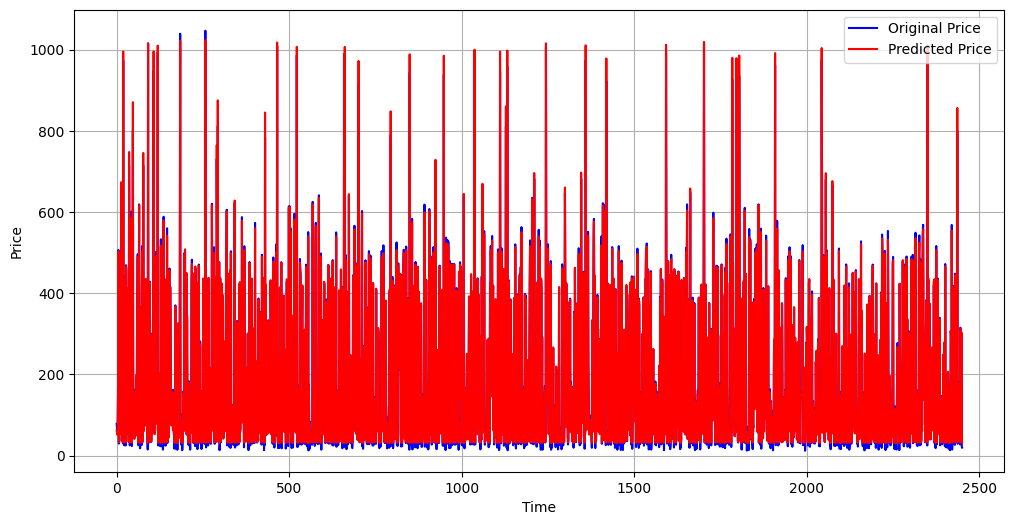

In [41]:
# Plotting the predictions against the true values
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 6.58317012855747
RMSE: 9.32319357829117


In [46]:
from sklearn.metrics import r2_score
# Calculate evaluation metrics
r2 = r2_score(y_test, pred) *100
print("R-squared percentage:", r2)

R-squared percentage: 99.74468230824802


In [ ]:
#As this checkpoint submission we are submitting the file what were we tried to implement we need make many changes for check point II we will come with different models implementation and  correct we will if any any changes make in this code also.